In [3]:
import matplotlib.pyplot as plt
import warnings
from math import sqrt
from matplotlib.gridspec import GridSpec
from scipy.ndimage import uniform_filter
from skimage import data
from skimage.io import imread, imshow
from skimage.util import img_as_ubyte


%matplotlib inline
warnings.filterwarnings("ignore")

# The Global Vally Approach to Thresholding

In [4]:
def show_original(image):
    fig = plt.figure(figsize=(12,12), constrained_layout=True)
    gs = GridSpec(3, 3, figure=fig)
    
    # Original image
    plt.subplot(gs[0, 0])
    plt.title("Original")
    plt.axis("off")
    imshow(image)
    
    # Original histogram
    plt.subplot(gs[0, 1:])
    plt.title("Original - histogram")
    y, x, patches = plt.hist(image.flatten(), bins=256, range=(0, 256)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
    
    return x[:-1], y 

In [5]:
def first_loop():
    hi_max = 0
    hi = []

    for i in range(256):
        # calculate hi
        if y[i] > hi_max:
            hi_max = y[i]
        hi.append(hi_max)
    return hi_max, hi

In [6]:
def s(u):
    """
    sign function
    """
    if u < 0:
        return 0
    return u

In [7]:
def F(i, j, k):
    return (s(i - j) + s(k - j)) / 2

In [8]:
def G(i, j, k):
    return sqrt(s(i - j) * s(k - j))

In [9]:
def second_loop():
    hk_max = 0
    hk = [0] * 256

    Fj = []
    Fj_max = 0
    Fj_peaks = []

    Gj = []
    Gj_max = 0
    Gj_peaks = []

    for i in range(255, -1, -1):
        # calculate hk
        if y[i] > hk_max:
            hk_max = y[i]
        hk[i] = hk_max

        # calculate Fj, Gj
        if i != 0 and i != 255:
            # Fj
            f = F(hi[i - 1], y[i], hk[i + 1])
            if f > Fj_max:
                Fj_max = f
                Fj_peaks = []
                Fj_peaks.append(x[i])
            elif f == Fj_max:
                Fj_peaks.append(x[i])
            Fj.insert(0, f)

            # Gj
            g = G(hi[i - 1], y[i], hk[i + 1])
            if g > Gj_max:
                Gj_max = g
                Gj_peaks = []
                Gj_peaks.append(x[i])
            elif g == Gj_max:
                Gj_peaks.append(x[i])
            Gj.insert(0, g)

    # zero padding (0, 255)
    Fj.insert(0, 0)
    Fj.append(0)
    Gj.insert(0, 0)
    Gj.append(0) 
    
    return hk_max, hk, Fj, Fj_max, Fj_peaks, Gj, Gj_max, Gj_peaks

In [10]:
def show_thresholding(image, fg, index=0):
    fig = plt.figure(figsize=(12,12), constrained_layout=True)
    gs = GridSpec(3, 3, figure=fig)
    
    # After image
    plt.subplot(gs[0, 0])
    plt.axis("off")
    if fg == "f":
        plt.title("Fj")
        binary = img_as_ubyte(image > Fj_peaks[index])
    elif fg == "g":
        plt.title("Gj")
        binary = img_as_ubyte(image > Gj_peaks[index])    
    imshow(binary)
    
    # After histogram
    plt.subplot(gs[0, 1:])    
    if fg == "f":
        plt.title("Fj - histogram")
        plt.axvline(Fj_peaks[index], color="r")
        b, a, patches = plt.hist(x, bins=256, weights=Fj)
    elif fg == "g":
        plt.title("Gj - histogram")
        plt.axvline(Gj_peaks[index], color="r")
        b, a, patches = plt.hist(x, bins=256, weights=Gj)

## Example 1

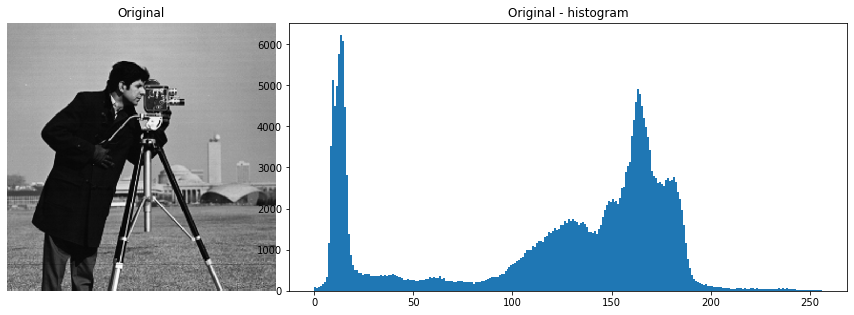

In [11]:
cameraman = data.camera()
x, y = show_original(cameraman)

In [12]:
hi_max, hi = first_loop()

In [13]:
hk_max, hk, Fj, Fj_max, Fj_peaks, Gj, Gj_max, Gj_peaks = second_loop()

In [14]:
Fj_peaks, Fj_max

([80.0], 5395.0)

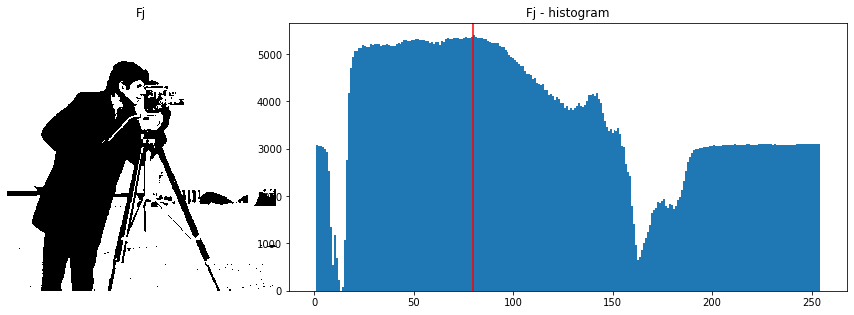

In [15]:
show_thresholding(cameraman, "f")

In [16]:
Gj_peaks, Gj_max

([80.0], 5355.335283621372)

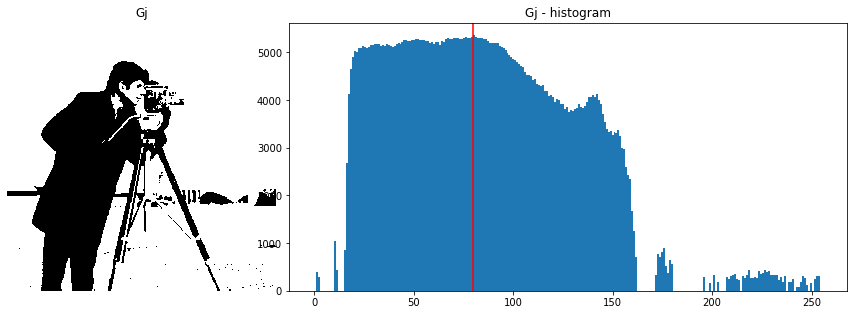

In [17]:
show_thresholding(cameraman, "g")

## Example 2

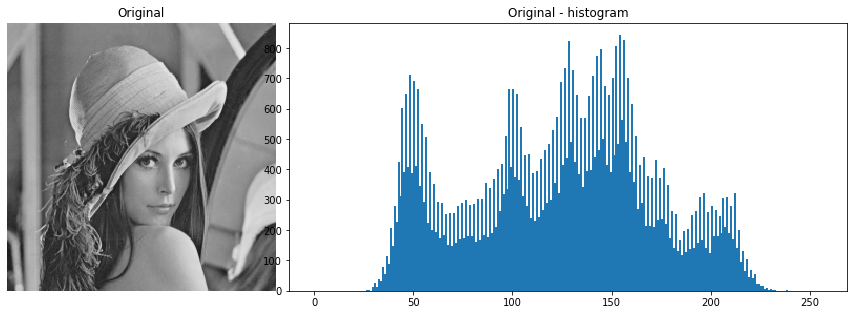

In [18]:
lena = imread("data/lena.bmp")
#lena = img_as_ubyte(rgb2gray(lena))
x, y = show_original(lena)

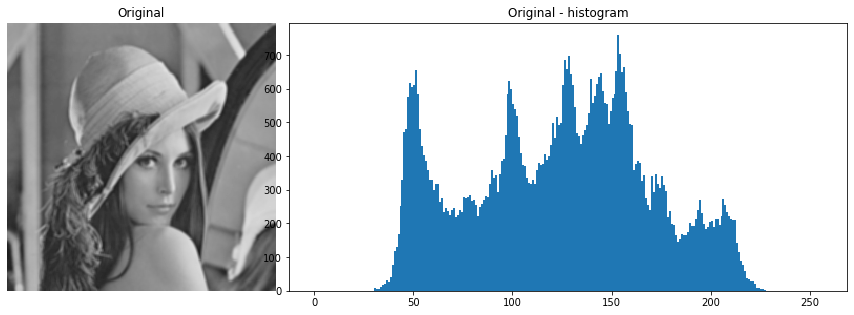

In [19]:
lena_mean = uniform_filter(lena, 3)
x, y = show_original(lena_mean)

In [20]:
hi_max, hi = first_loop()

In [21]:
hk_max, hk, Fj, Fj_max, Fj_peaks, Gj, Gj_max, Gj_peaks = second_loop()

In [22]:
Fj_peaks, Fj_max

([71.0], 488.0)

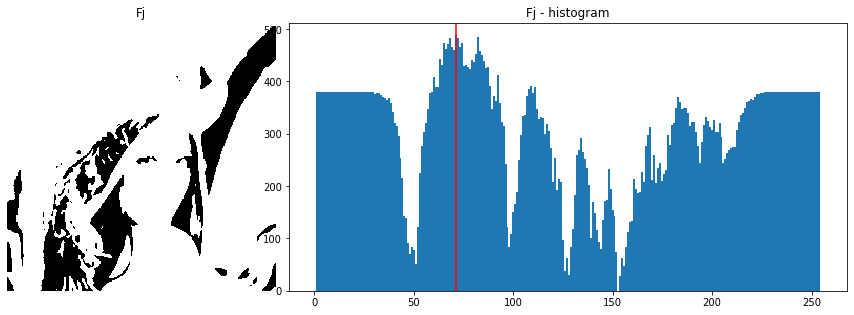

In [23]:
show_thresholding(lena_mean, "f")

In [24]:
Gj_peaks, Gj_max

([71.0], 485.22159885973747)

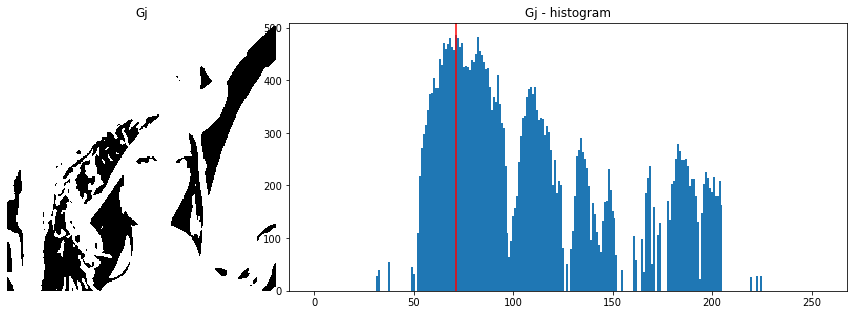

In [25]:
show_thresholding(lena_mean, "g")